In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458560,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344078,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386254,447610800


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447412,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458560,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355827,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344078,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386254,447610800


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


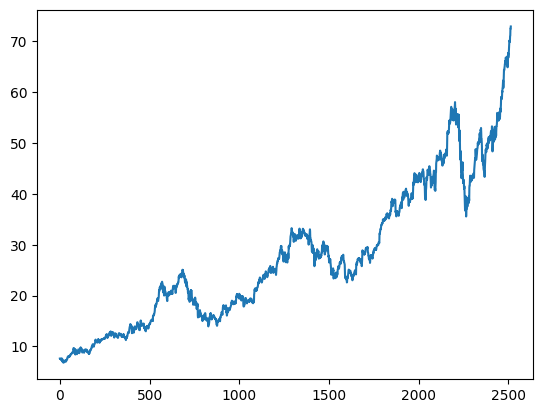

In [5]:
plt.plot(df.Close)

In [6]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

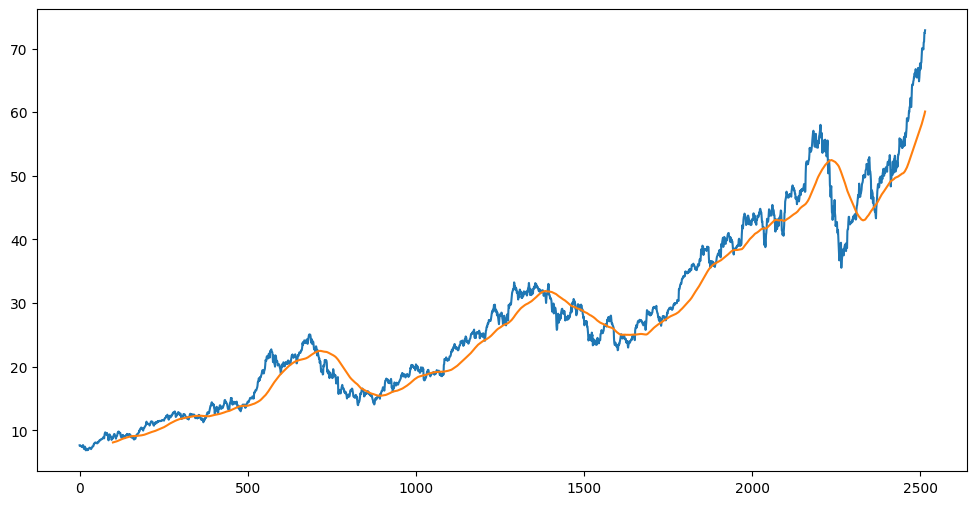

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

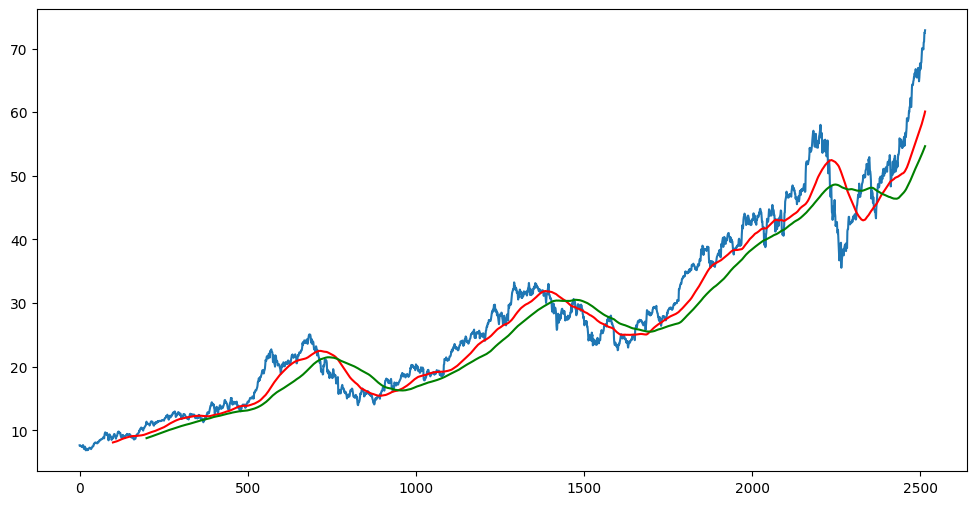

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2515, 5)

In [12]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
data_testing.shape

(1760, 1)


(755, 1)

In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape

(1760, 1)

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [18]:

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential 

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\DEEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - loss: 0.1680
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0176
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0104
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - loss: 0.0106
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 0.0100
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 0.0099
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 0.0087
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - loss: 0.0087
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - loss: 0.0083
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 0.0080
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 0.0076
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 0.0073
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0081
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 0.0074
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 1

In [71]:
model.save('keras_model.h5')

In [72]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [73]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [74]:
past_100_days=data_training.tail(100)


In [75]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [76]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [77]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [78]:
input_data.shape

(855, 1)

In [79]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [80]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(755, 100, 1)
(755,)


In [81]:
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


In [82]:
y_predicted.shape

(755, 1)

In [83]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [84]:
y_predicted

array([[0.13762607],
       [0.13812251],
       [0.13857014],
       [0.13894367],
       [0.13923272],
       [0.13943182],
       [0.13955079],
       [0.13961889],
       [0.1396745 ],
       [0.13974714],
       [0.13986479],
       [0.14003514],
       [0.14025597],
       [0.14053257],
       [0.14086117],
       [0.1412302 ],
       [0.14162838],
       [0.14204265],
       [0.14246309],
       [0.14290509],
       [0.14337638],
       [0.14387757],
       [0.14439783],
       [0.14495553],
       [0.14565408],
       [0.14656353],
       [0.14771634],
       [0.149159  ],
       [0.15093109],
       [0.15304305],
       [0.15547502],
       [0.15819   ],
       [0.16116166],
       [0.16436724],
       [0.16776848],
       [0.17131522],
       [0.17496252],
       [0.17867075],
       [0.18238933],
       [0.18606289],
       [0.18964109],
       [0.19307822],
       [0.19636436],
       [0.19949211],
       [0.20246056],
       [0.20526406],
       [0.20789465],
       [0.210

In [85]:
scaler.scale_

array([0.02123255])

In [86]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor


<module 'matplotlib.pyplot' from 'c:\\Users\\DEEL\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

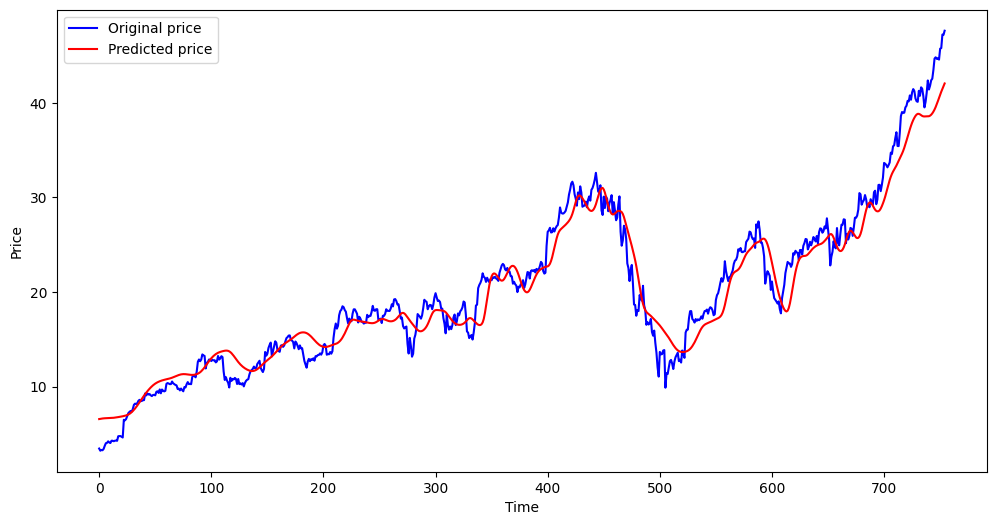

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt